In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv('3-customersatisfaction.csv')

In [4]:
df.head()

,Unnamed: 0,Customer Satisfaction,Incentive
0,0,-1.282447,1.010513
1,1,0.425298,2.281043
2,2,1.953070,4.415053
3,3,2.625838,10.563600
4,4,-1.426333,0.627365


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             100 non-null    int64  
 1   Customer Satisfaction  100 non-null    float64
 2   Incentive              100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [6]:
df.describe()

,Unnamed: 0,Customer Satisfaction,Incentive
count,100.000000,100.000000,100.000000
mean,49.500000,-0.005427,3.445220
std,29.011492,1.721792,2.911818
min,0.000000,-2.992863,-1.068081
25%,24.750000,-1.431357,1.471341
50%,49.500000,0.109167,2.748839
75%,74.250000,1.421119,4.739113
max,99.000000,2.986736,11.000056


In [7]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
df.head()

,Customer Satisfaction,Incentive
0,-1.282447,1.010513
1,0.425298,2.281043
2,1.953070,4.415053
3,2.625838,10.563600
4,-1.426333,0.627365


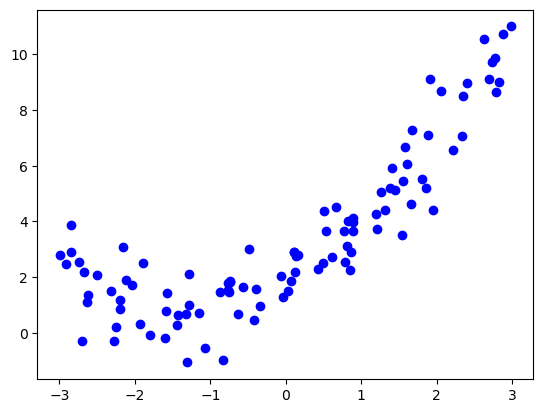

In [9]:
plt.scatter(df['Customer Satisfaction'], df['Incentive'],c='b')
plt.show()

In [10]:
# dependent & independent features
X = df[['Customer Satisfaction']]
y = df['Incentive']

In [11]:
X.head()

,Customer Satisfaction
0,-1.282447
1,0.425298
2,1.953070
3,2.625838
4,-1.426333


In [12]:
y.head()

0     1.010513
1     2.281043
2     4.415053
3    10.563600
4     0.627365
Name: Incentive, dtype: float64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [14]:
regression = LinearRegression()

In [15]:
scaler = StandardScaler()

In [16]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
regression.fit(X_train, y_train)

LinearRegression()

In [18]:
# prediction

In [19]:
y_pred = regression.predict(X_test)

In [20]:
score = r2_score(y_test, y_pred)
print(score)

0.2705652535622246


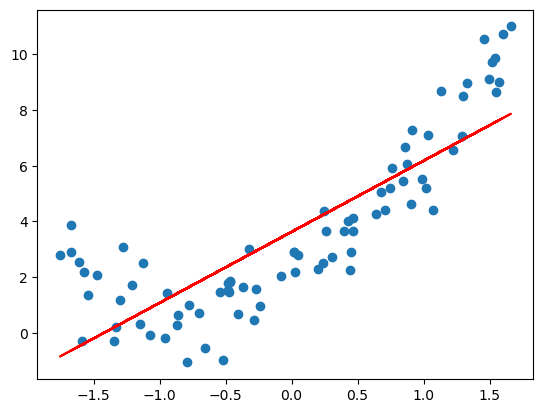

In [21]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train), c='r')
plt.show()

In [22]:
poly = PolynomialFeatures()

In [23]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [24]:
X_train_poly

array([[ 1.00000000e+00,  2.47633535e-01,  6.13223675e-02],
       [ 1.00000000e+00,  1.45565669e+00,  2.11893639e+00],
       [ 1.00000000e+00, -5.40182671e-01,  2.91797318e-01],
       [ 1.00000000e+00, -7.00039198e-01,  4.90054879e-01],
       [ 1.00000000e+00,  1.56862116e+00,  2.46057233e+00],
       [ 1.00000000e+00,  9.87568378e-01,  9.75291302e-01],
       [ 1.00000000e+00,  4.48640749e-01,  2.01278522e-01],
       [ 1.00000000e+00,  1.54377517e+00,  2.38324178e+00],
       [ 1.00000000e+00,  1.33219938e+00,  1.77475518e+00],
       [ 1.00000000e+00, -4.80410926e-01,  2.30794658e-01],
       [ 1.00000000e+00,  3.92892957e-01,  1.54364876e-01],
       [ 1.00000000e+00, -6.57456685e-01,  4.32249293e-01],
       [ 1.00000000e+00,  4.42663768e-01,  1.95951211e-01],
       [ 1.00000000e+00, -8.72131603e-01,  7.60613533e-01],
       [ 1.00000000e+00, -1.57257044e+00,  2.47297780e+00],
       [ 1.00000000e+00, -4.70184630e-01,  2.21073587e-01],
       [ 1.00000000e+00, -8.36083500e-02

In [25]:
regression.fit(X_train_poly, y_train)

LinearRegression()

In [26]:
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred)
print(score)

0.7685687698788557


In [27]:
regression.coef_

array([0.        , 2.63871762, 1.54959954])

In [28]:
regression.intercept_

2.076676429793282

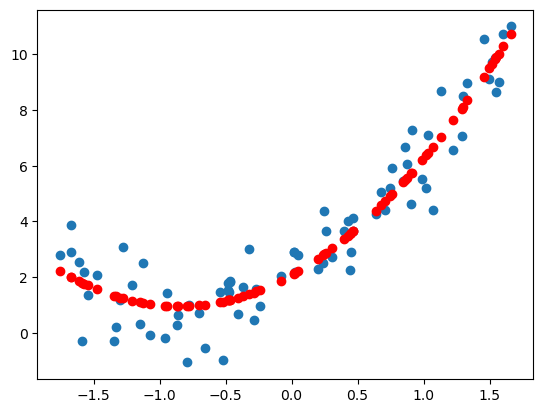

In [29]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, regression.predict(X_train_poly), c='r')
plt.show()

In [30]:
poly = PolynomialFeatures(degree=3, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [31]:
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred)
print(score)

0.7573443621401048


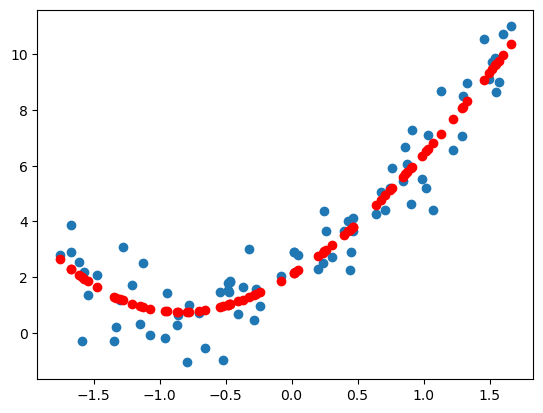

In [32]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, regression.predict(X_train_poly), c='r')
plt.show()

In [33]:
new_df = pd.read_csv('3-newdatas.csv')

In [34]:
new_df

,0
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [35]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       200 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [36]:
new_df.describe()

,0
count,2.000000e+02
mean,0.000000e+00
std,1.745101e+00
min,-3.000000e+00
25%,-1.500000e+00
50%,-1.994932e-16
75%,1.500000e+00
max,3.000000e+00


In [37]:
new_df.rename(columns={'0':'Customer Satisfaction'},inplace=True)

In [38]:
new_df

,Customer Satisfaction
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [39]:
X_new = new_df[['Customer Satisfaction']]

In [40]:
X_new = scaler.fit_transform(X_new)
X_new_poly = poly.transform(X_new)